In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.ion()

In [4]:
# Loading Time surface dataset


# Toluene


time_surf_Tol=[]


for i in range(1,21):
    a=np.load('/home/shavika/Shavika/Datasets/Toluene_200/Time_Surfaces_Toluene_200/Time_Surface_'+str(i)+'.npy')
    time_surf_Tol.append(a)
    
    

# Acetaldehyde

time_surf_Ace=[]

for i in range(1,21):
    b=np.load('/home/shavika/Shavika/Datasets/Acetaldehyde_500/Time_Surfaces_Acetaldehyde_500/Time_Surface_'+str(i)+'.npy')
    time_surf_Ace.append(b)
    
    

# Methanol

time_surf_M=[]


for i in range(1,21):
    c=np.load('/home/shavika/Shavika/Datasets/Methanol_200/Time_Surfaces_Methanol_200/Time_Surface_'+str(i)+'.npy')
    time_surf_M.append(c)
    
    
# Carbonmonoxide

time_surf_CO=[]


for i in range(1,21):
    d=np.load('/home/shavika/Shavika/Datasets/CO_4000/Time_Surfaces_CO_4000/Time_Surface_'+str(i)+'.npy')
    time_surf_CO.append(d)

In [5]:
print(np.shape(time_surf_Tol))

(20, 6, 5, 25999)


In [6]:
# Data Visualization

# Standard Scalar Nornalization


from sklearn.preprocessing import StandardScaler

time_surf_all=np.vstack((time_surf_Tol,time_surf_Ace,time_surf_M,time_surf_CO))

time_surf_all_r=np.reshape(time_surf_all,(len(time_surf_all),(6*5*25999)))

scaler=StandardScaler()

time_surf_all_scaled=scaler.fit_transform(time_surf_all_r)

print(np.shape(time_surf_all_scaled))

(80, 779970)


In [8]:
from sklearn.decomposition import PCA

pca_1d_all=PCA(n_components=1)

time_surf_1d=pca_1d_all.fit(time_surf_all_scaled)

p_1d=pca_1d_all.fit_transform(time_surf_all_scaled)

print(np.shape(p_1d))

(80, 1)


In [12]:
print(p_1d[0:20])

[[ 232.09454201]
 [ 254.24690871]
 [ 256.98814591]
 [  44.84407411]
 [ 235.21411882]
 [ 271.28348704]
 [ 341.52570973]
 [ 145.13135613]
 [ 220.68588177]
 [ 169.53390815]
 [ 164.67581615]
 [ 173.57061364]
 [ 253.31950323]
 [ 277.03474352]
 [ 287.01533857]
 [  76.72139926]
 [-190.15284548]
 [ 216.08700504]
 [ 204.34308896]
 [ 241.12057218]]


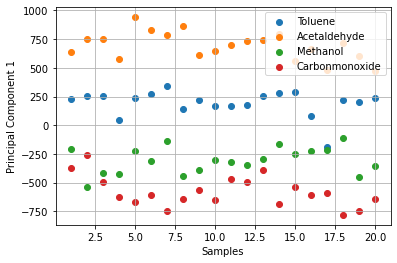

In [15]:
# Plotting

samples=np.arange(1,21,1)

plt.figure()

plt.scatter(samples,p_1d[:20],label='Toluene')
plt.scatter(samples,p_1d[20:40],label='Acetaldehyde')
plt.scatter(samples,p_1d[40:60],label='Methanol')
plt.scatter(samples,p_1d[60:],label='Carbonmonoxide')
plt.xlabel('Samples')
plt.ylabel('Principal Component 1')
plt.legend(loc=1)
plt.grid()





In [16]:
pca_2d_all=PCA(n_components=2)

time_surf_2d=pca_2d_all.fit(time_surf_all_scaled)

p_2d=pca_2d_all.fit_transform(time_surf_all_scaled)

print(np.shape(p_2d))

(80, 2)


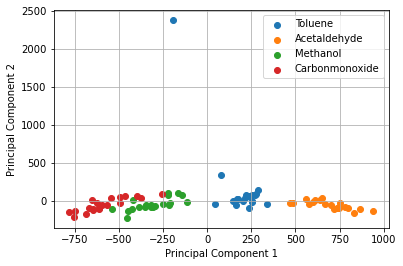

In [22]:
plt.figure()

plt.scatter(p_2d[0:20,0],p_2d[0:20,1],label='Toluene')

plt.scatter(p_2d[20:40,0],p_2d[20:40,1],label='Acetaldehyde')

plt.scatter(p_2d[40:60,0],p_2d[40:60,1],label='Methanol')

plt.scatter(p_2d[60:,0],p_2d[60:,1],label='Carbonmonoxide')

plt.xlabel('Principal Component 1')

plt.ylabel('Principal Component 2')

plt.legend(loc=1)

plt.grid()



In [50]:
# SVM Classifier

y=np.hstack((np.zeros(20),np.ones(20),np.ones(20)*2,np.ones(20)*3))


from sklearn.model_selection import train_test_split
# Splitting into training and test dataset


X_train,X_test,y_train,y_test=train_test_split(p_2d,y,random_state=0)

print(y_train)


[2. 1. 2. 3. 2. 0. 3. 3. 0. 2. 3. 0. 1. 2. 1. 0. 2. 1. 0. 1. 2. 3. 0. 1.
 3. 0. 2. 0. 1. 2. 1. 1. 0. 0. 3. 0. 0. 2. 0. 2. 1. 3. 0. 0. 1. 1. 2. 1.
 3. 2. 0. 3. 1. 1. 0. 3. 3. 3. 2. 2.]


In [51]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


svm_model=OneVsRestClassifier(SVC()).fit(X_train,y_train)

svm_predictions=svm_model.predict(X_test)

accuracy=svm_model.score(X_test,y_test)

cm=confusion_matrix(y_test,svm_predictions)

print('Accuracy :',accuracy)


Accuracy : 0.95


<AxesSubplot:>

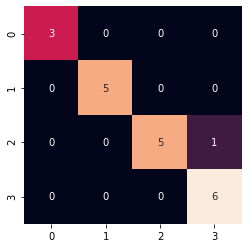

In [52]:
import seaborn as sns
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)

In [55]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dtree_model=DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)

dtree_predictions=dtree_model.predict(X_test)

accuracy_dtree=dtree_model.score(X_test,y_test)

print('Accuracy :',accuracy_dtree)

cm_dtree=confusion_matrix(y_test,dtree_predictions)

Accuracy : 0.65


<AxesSubplot:>

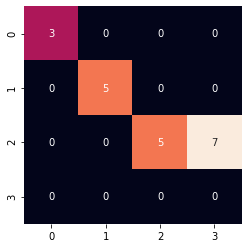

In [54]:
import seaborn as sns
sns.heatmap(cm_dtree.T, square=True, annot=True, fmt='d', cbar=False)

In [64]:
# K-Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)

accuracy_knn=knn_model.score(X_test,y_test)

print('Accuracy :',accuracy_knn)

knn_predictions=knn_model.predict(X_test)

cm_knn=confusion_matrix(y_test,knn_predictions)

Accuracy : 0.95


<AxesSubplot:>

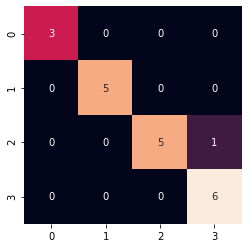

In [65]:
import seaborn as sns
sns.heatmap(cm_knn.T, square=True, annot=True, fmt='d', cbar=False)